<a href="https://colab.research.google.com/github/TheRyidGilani/EE8603/blob/main/EE8603_White_Wine_Classification_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EE8603 Final Research Project**

**Ryid Gilani**

**500881574**

##Introduction

In this project, we will use machine learning to predict the quality of white wine, using a classification method.

>The goal is to create a machine learning model capable of predicting the target variable, in this case "Quality", based on other physicochemical features given in the dataset.

>The model should categorize the wine samples into classes, where each class represents a level of quality.

To begin, import the necessary libraries, as shown below.

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd

## Data Preparation

Next, download and unzip the dataset from the internet, using its download URL, as shown below.

The downloaded file is then saved as "wine.zip" in the directory.

In [ ]:
#Import the data via it's download URL into the directory.
!wget -q https://archive.ics.uci.edu/static/public/186/wine+quality.zip
!unzip -q wine+quality.zip

Upon observing the directory, you can see that two .csv files (commma-seperated values File) are given in this dataset, one is for red wine, and the other is for white wine.

This project will use the white wine dataset.
The specific dataset is imported into Pandas dataframe using the following lines of code:

In [ ]:
# Load the dataset into the data frame and separate each semicolon into columns.
white_wine_df = pd.read_csv('winequality-white.csv', sep=';')
#Display Data
white_wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


Now the data set is presentable in a tabular format.

## Exploratory Data Analysis (EDA)

We can check the number of rows and columns in the dataset, with the line of code shown below.

In [ ]:
#Display number of rows and columns.
white_wine_df.shape

(4898, 12)

>The 4898 rows represent 4898 different samples of white wine.

>The 12 columns represent 12 distinct features of white wine.

"Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available. (e.g. There is no data about grape types, wine brand, wine selling price, etc.)"

-As stated on the dataset website, https://archive.ics.uci.edu/dataset/186/wine+quality



In [ ]:
white_wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In the table produced above, we can see the target column, Quality, has a data type of "int64".

While all the other columns have a data type of float64.

We need to ensure that there is no missing values in the data frame.

Therefore, we can check for missing values using the following code:

In [ ]:
#Check for null values in each column, and display the sum of null values in each column.
white_wine_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

To further our understanding of this data, we will use the Pandas method to provide statistics for each column in the dataset.

In [ ]:
white_wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


## EDA Visualization

We can use the exploratory data analysis from the last section to visualize the data.

Visualization of the data is a crucial step in the machine learning pipeline.

It aids us in later steps such as feature selection, model understanding, and perfomance evaluation.

We will use the seaborn and matplotlib libraries to create a bar graph visualization of "Number of samples vs Quality".

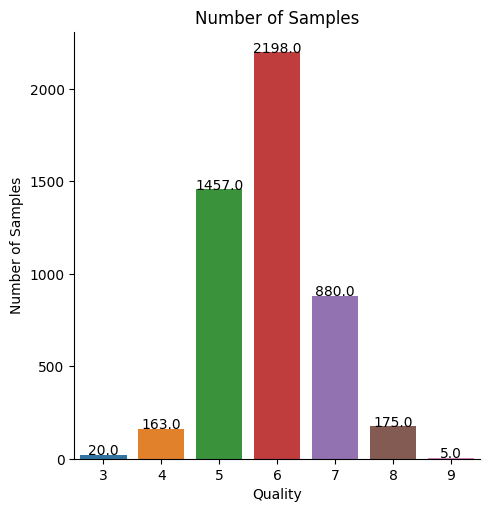

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a Catplot visualization
g = sns.catplot(x='quality', data=white_wine_df, kind='count')

# Add numerical values as text annotations
ax = g.ax
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

# Customize the plot if needed
plt.title("Number of Samples")
plt.xlabel("Quality")
plt.ylabel("Number of Samples")

# Show the plot
plt.show()

In [ ]:
# distribution of the classes in descending order
white_wine_df['quality'].value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

Upon visual inspection of the graph produced above, we can see that:
*  This dataset is not evenly distrubuted. For example, there are more samples collected in Quality 6 than in Quality 9.

*   Majority of the White Wine samples have a quality of 6, and very few samples have a quality of 9.

* This dataset only has samples of White wine with quality in the ranges 3-9.

Since this is a classification task, we will associate a higher value with better quality.
Therefore, we can say that a wine quality of 9 is much better than a wine quality of 3.  The quality classes are not equal to each other.

Next we can further visualize our understanding of how each column in the dataset impacts our target column (quality).

This is shown in the following lines of code:

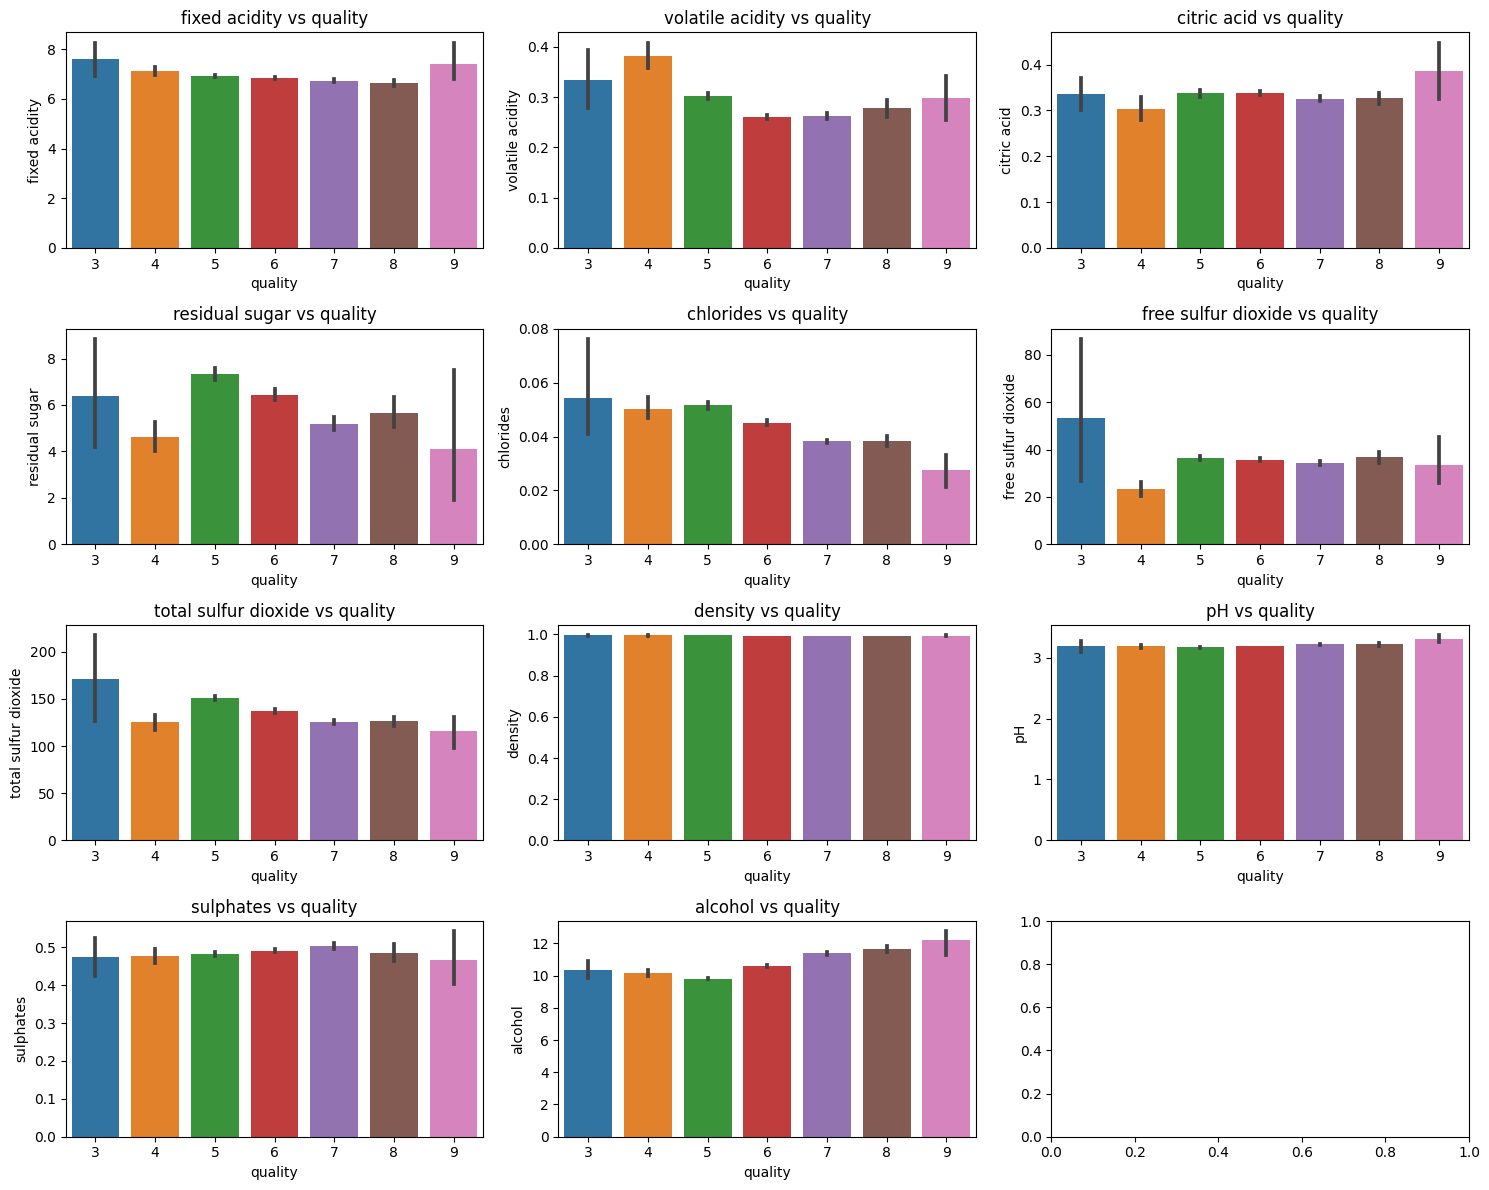

In [ ]:
# Define the features you want to visualize
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
            'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
            'pH', 'sulphates', 'alcohol']

# Create subplots for multiple bar plots in a 4x3 matrix
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 12))

# Flatten the 4x3 matrix of subplots for easy indexing
axes = axes.ravel()

# Iterate through the selected features and create bar plots
for i, feature in enumerate(features):
    sns.barplot(x='quality', y=feature, data=white_wine_df, ax=axes[i])
    axes[i].set_xlabel('quality')
    axes[i].set_ylabel(feature)
    axes[i].set_title(f'{feature} vs quality')

# Adjust layout
plt.tight_layout()

# Show the subplots
plt.show()

Finally we will use a Heatmap to complete the EDA Visualization.
* A heatmap is a powerful visualization tool that allows us to easily grasp the relationships and dependencies between variables in the dataset.
* It will provide a numerical value for the correlation between the columns in the dataset. This value can be positive or negative.

<AxesSubplot: >

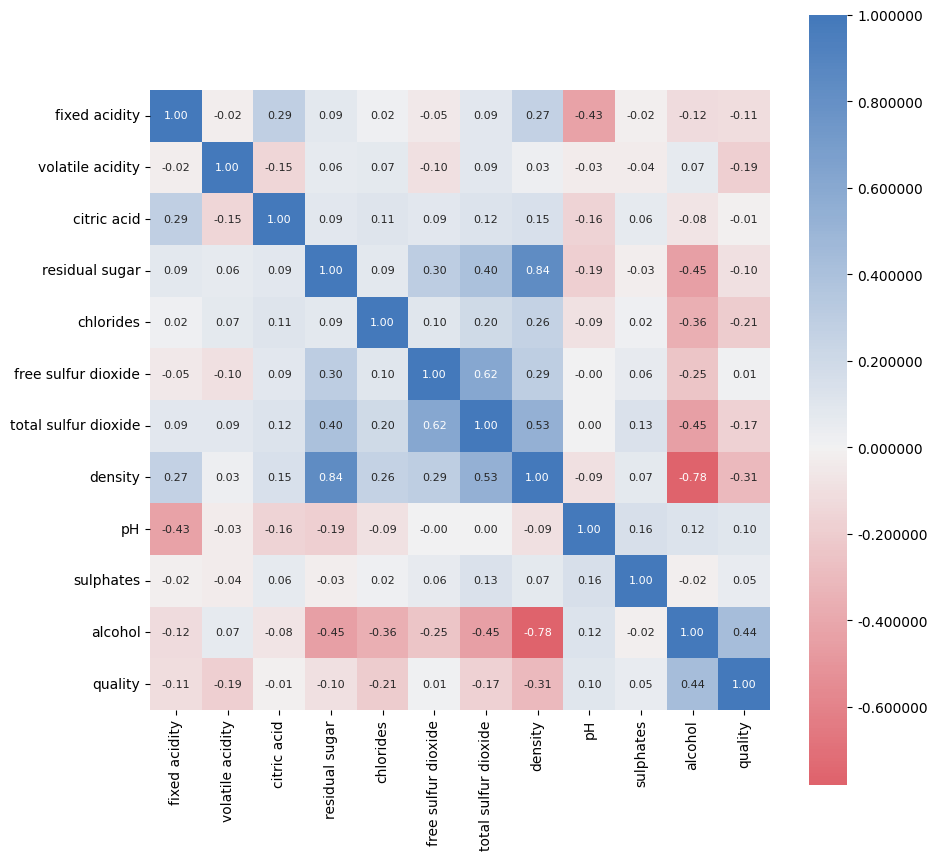

In [ ]:
# Calculate the correlation matrix
correlation = white_wine_df.corr()

# Set the colormap to have white at 0, blue for positive correlations, and red for negative correlations
cmap = sns.diverging_palette(10, 250, as_cmap=True)

# Create the heatmap with the adjusted colormap and centered color scale
plt.figure(figsize=(10, 10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.2f', annot=True, annot_kws={'size': 8}, cmap=cmap, center=0, cbar_kws={'format': '%1f'})

In the heatmap generated above if the colour of a box is:

*  Blue, it means the two variables are directly proportional. These values are also positive in the heatmap. For example, Alcohol and Quality.

  > If one value increases, then the other value also increases.

* White, it means that there is not really a corelation between the two variables. These values are 0.00. For example, pH and Free Sulfur Dioxide.
 > If one value increases, then nothing happens to the other value.

* Red, it means the two variables are inversely proportional. These values are negative, and red in the heatmap. For example, Alcohol and Density.
> If one value increases, then the other value decreases.

However, we are only interested in the last column in this heatmap, as it describes the corelation between all columns and the target column. We can display the final column with the code shown below.

<AxesSubplot: >

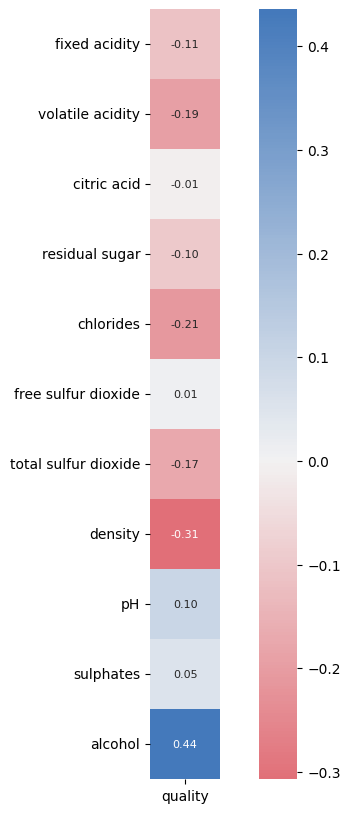

In [ ]:
# Calculate the correlation of the 'quality' column with all other columns
correlation_last_column = white_wine_df.corr()['quality'][:-1]

# Set the colormap to have white at 0, blue for positive correlations, and red for negative correlations
cmap = sns.diverging_palette(10, 250, as_cmap=True)

# Create the heatmap with the adjusted colormap
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_last_column.to_frame(), cbar=True, square=True, fmt='.2f', annot=True, annot_kws={'size': 8}, cmap=cmap, center=0)


The final column of the heatmap, (shown above), describes the corelation between all our columns and our target column.

Out of all columns in the data set, Alcohol seems to have the most impact on the Quality column, with a corelation value of 0.44.

However, it doesnt make that big of an impact since 0.44 is not that close to 1.

This concludes the EDA Analysis.

## DataType Conversion

In [ ]:
#Changing the data type of the "Quality" column to categorical.
white_wine_df['quality'] = white_wine_df['quality'].astype('category')
white_wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   fixed acidity         4898 non-null   float64 
 1   volatile acidity      4898 non-null   float64 
 2   citric acid           4898 non-null   float64 
 3   residual sugar        4898 non-null   float64 
 4   chlorides             4898 non-null   float64 
 5   free sulfur dioxide   4898 non-null   float64 
 6   total sulfur dioxide  4898 non-null   float64 
 7   density               4898 non-null   float64 
 8   pH                    4898 non-null   float64 
 9   sulphates             4898 non-null   float64 
 10  alcohol               4898 non-null   float64 
 11  quality               4898 non-null   category
dtypes: category(1), float64(11)
memory usage: 426.2 KB


We have now converted the datatype of the quality column, to categorical. This is logical as this is a classification project.

## Pycaret

PyCaret is an open-source machine learning library in Python that facilitates the end-to-end process of machine learning models. It is designed to simplify and accelerate the machine learning workflow, and we will use it to help us choose and create the best model.

Lets start by installing Pycaret library, shown below.

In [ ]:
#Install Pycaret
!pip install pycaret

Once Pycaret is done installing, we can use the "setup" function to initialize the PyCaret environment and prepare the dataset for modeling.

During the setup process, PyCaret automatically handles common data preprocessing tasks, such as handling missing values, encoding categorical variables, and splitting the data into training and testing sets, streamlining the workflow for building and evaluating classification models.


In [ ]:
# Set up PyCaret with the 'quality' as the target variable
from pycaret.classification import *
from pycaret.classification import setup
experiment = setup(white_wine_df, target='quality', session_id= 123)

,Description,Value
0,Session id,123
1,Target,quality
2,Target type,Multiclass
3,Target mapping,"3: 0, 4: 1, 5: 2, 6: 3, 7: 4, 8: 5, 9: 6"
4,Original data shape,"(4898, 12)"
5,Transformed data shape,"(4898, 12)"
6,Transformed train set shape,"(3428, 12)"
7,Transformed test set shape,"(1470, 12)"
8,Numeric features,11
9,Preprocess,True


**Note:** The session_id=123 parameter is optional but helps in reproducing the same results in subsequent runs.

We can now proceed to easily compare classification models using the "compare_models" function in Pycaret. The Function is assigned to a variable named, 'best_model', which will be the best model in the comparision.

In [ ]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.6666,0.3417,0.6666,0.6741,0.6527,0.4778,0.4855,0.8770
et,Extra Trees Classifier,0.6642,0.3423,0.6642,0.6718,0.6509,0.4743,0.4828,0.4660
xgboost,Extreme Gradient Boosting,0.6403,0.3319,0.6403,0.6405,0.6309,0.4484,0.4513,0.6570
lightgbm,Light Gradient Boosting Machine,0.6389,0.3302,0.6389,0.6365,0.6287,0.4447,0.4477,2.7720
gbc,Gradient Boosting Classifier,0.5741,0.3081,0.5741,0.5706,0.5570,0.3305,0.3382,4.9800
dt,Decision Tree Classifier,0.5694,0.2710,0.5694,0.5688,0.5682,0.3630,0.3633,0.0760
lda,Linear Discriminant Analysis,0.5239,0.2833,0.5239,0.5079,0.4991,0.2416,0.2518,0.0770
ridge,Ridge Classifier,0.5216,0.0000,0.5216,0.4512,0.4478,0.1941,0.2216,0.0600
lr,Logistic Regression,0.5134,0.2788,0.5134,0.4698,0.4658,0.1996,0.2155,1.7180
knn,K Neighbors Classifier,0.4696,0.2615,0.4696,0.4519,0.4535,0.1784,0.1803,0.0630


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

The table above presents the performance metrics of various machine learning models for classification. Each row corresponds to a different classifier, and each column corresponds to various performance metrics.

Pycaret's comparision indicates that The Random Forest Classifier (rf) is the best model with the best overall metrics. We can further investigate the best model by printing it's hyperparameters, shown below.

In [ ]:
print(best_model)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)


These are the configured hyperparameters optimized through PyCaret's automated comparison.

Overall, the RandomForestClassifier, with it's optimized configuration, emerges as the most effective model for the classification task, as determined by PyCaret's comparative evaluation.

Next, we can easily create the best model with Pycarets "create_model" function.

The model is assigned to a variable named, 'best', shown below.

In [ ]:
best = create_model(best_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6764,0.0000,0.6764,0.6865,0.6672,0.4937,0.5023
1,0.6560,0.0000,0.6560,0.6651,0.6467,0.4645,0.4697
2,0.6210,0.0000,0.6210,0.6128,0.6001,0.3973,0.4088
3,0.6764,0.0000,0.6764,0.6958,0.6599,0.4962,0.5007
4,0.6910,0.8697,0.6910,0.6972,0.6742,0.5180,0.5241
5,0.7172,0.8688,0.7172,0.7339,0.7042,0.5552,0.5670
6,0.6210,0.8224,0.6210,0.6379,0.6059,0.4046,0.4120
7,0.6647,0.8564,0.6647,0.6635,0.6557,0.4815,0.4859
8,0.6930,0.0000,0.6930,0.7013,0.6825,0.5227,0.5294


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

The table above displays the performance metrics of the best model across different folds in a cross-validation process.

Overall, the model exhibits an average accuracy of 66.66%, with notable variations in performance metrics across folds.

We can view the confusion matrix to see the number of True & False Positives, with the line of code shown below.

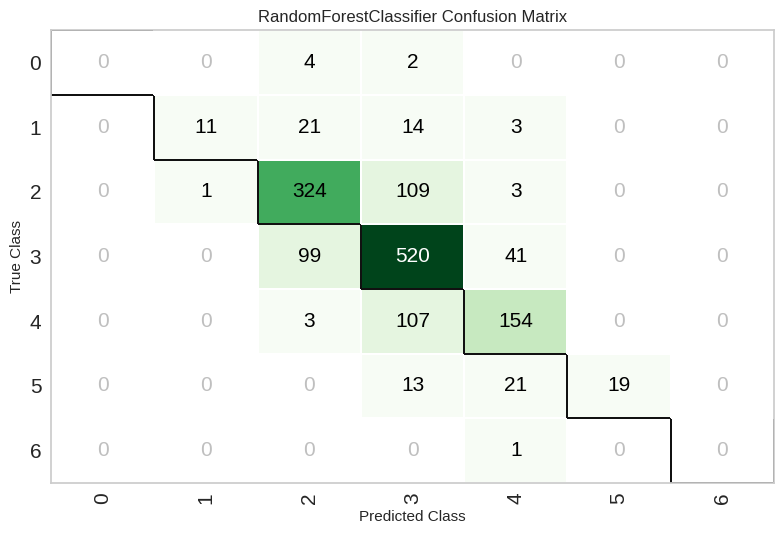

In [ ]:
plot_model(best, plot="confusion_matrix")

In the confusion matrix shown above, the Y-axis represents the True Classes and the X-axis represents the Predicted Classes.

The diagonal elements represent the True Positives, where as the off diagonal elements represent False Positives.


Below is a breakdown of the matrix:

* **Class 0 (Wine Quality 3)**

  * 0 True Positives.
  * 0 False Positives.

* **Class 1 (Wine Quality 4)**
  * 11 True Positives.
  * 1 False Positives.


* **Class 2 (Wine Quality 5)**
  * 324 True Positives.
  * 127 False Positives.

* **Class 3 (Wine Quality 6)**
  * 520 True Positives.
  * 245 False Positives.

* **Class 4 (Wine Quality 7)**
  * 154 True Positives.
  *  69 False Positives.

* **Class 5 (Wine Quality 8)**
  * 19 True Positives.
  *  0 False Positives.

* **Class 6 (Wine Quality 9)**
  *  0 True Positives.
  *  0 False Positives.

The evaluate_model function in PyCaret provides a versatile set of visualizations for a comprehensive understanding of the best model's performance. It allows the user to toggle between different charts, enabling a tailored exploration of various aspects of the model's behavior. It is useful for gaining insights into specific metrics such as the confusion matrix, ROC curve, precision-recall curve, learning curve, and residuals plot.

In [ ]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

The "predict_model" function in PyCaret is used to generate predictions on new  data using our best model, the RandomForestClassifier. We apply this function to a dataset named holdout_pred, which represents our test set.

In [ ]:
# predict on test set
holdout_pred = predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.6993,0.8659,0.6993,0.7094,0.6892,0.5354,0.5390


Overall, these metrics suggest that the Random Forest Classifier is performing reasonably well on the **test data**.

In [23]:
# show predictions df
holdout_pred.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,prediction_label,prediction_score
139,8.1,0.28,0.39,1.9,0.029,18.0,79.0,0.99230,3.23,0.52,11.8,6,6,0.51
4620,6.4,0.38,0.19,4.5,0.038,36.0,119.0,0.99151,3.07,0.42,11.2,6,6,0.51
1689,7.1,0.16,0.25,1.3,0.034,28.0,123.0,0.99150,3.27,0.55,11.4,6,7,0.42
2724,7.5,0.18,0.31,6.5,0.029,53.0,160.0,0.99276,3.03,0.38,10.9,6,6,0.61
3812,7.9,0.21,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,5,5,0.77


Above we can see that the model is sucessfully predicting the quality class of the sample, along with the actual quality. It also includes a prediction score.
Note that some values are incorrectly predicted, as the metrics are not 100%.

Lets create a copy of the white_wine_df data frame and drop the quality column from it.

In [24]:
new_data = white_wine_df.copy()
new_data.drop('quality', axis=1, inplace=True)
new_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


Next we can add the predicted values from the Random forest Classifier to this new dataframe.

In [25]:
predictions = predict_model(best, data = new_data)
predictions.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,prediction_label,prediction_score
0,7.0,0.27,0.36,20.700001,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0.74
1,6.3,0.30,0.34,1.600000,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0.95
2,8.1,0.28,0.40,6.900000,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0.92
3,7.2,0.23,0.32,8.500000,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0.95
4,7.2,0.23,0.32,8.500000,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0.95


We have sucessfully created the model, and predicted it. The final step would be to save the model.

In [26]:
# save pipeline
save_model(best, 'White_wine_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['fixed acidity',
                                              'volatile acidity', 'citric acid',
                                              'residual sugar', 'chlorides',
                                              'free sulfur dioxide',
                                              'total sulfur dioxide', 'density',
                                              'pH', 'sulphates...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight=None, criterion='gini',
                                         max_depth=None, max_features='sqrt',
               

Now that the model is saved, and the machine learning pipeline has been created and displayed above.

If required, the pipeline can be loaded, shown below.

In [27]:
loaded_best_pipeline = load_model('White_wine_pipeline')
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['fixed acidity',
                                             'volatile acidity', 'citric acid',
                                             'residual sugar', 'chlorides',
                                             'free sulfur dioxide',
                                             'total sulfur dioxide', 'density',
                                             'pH'...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='sqrt',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100, n_jobs=-1,
                                        oob_score=False, random_state=123,
                                        verbose=0, warm_start=False))],
         verbose=False)

## Conclusion

In conclusion, this machine learning project on white wine quality classification was a comprehensive exploration of the dataset; employing various data analysis and visualization techniques. The initial dataset was downloaded and extracted from a public repository, and was thoroughly examined to understand its structure and characteristics.

The dataset, consisting of white wine features, was preprocessed to check for any missing values, and a summary of the dataset was provided, including statistical measures such as mean and standard deviation. Exploratory data analysis involved the creation of visualizations, including a categorical plot depicting the distribution of wine qualities and a series of bar plots showcasing the relationship between selected features and wine quality. Additionally, a correlation matrix and heatmap were generated to understand the relationships between different features and their correlation with the target variable, 'quality.' The correlation analysis provided insights into potential influential factors affecting wine quality. It was depicted that "Alcohol" had the most correlation with the quality.

The data preparation phase involved converting the 'quality' column to a categorical variable to facilitate the classification task. PyCaret, a machine learning library, was then utilized for model setup, comparison, and selection. The classification models were evaluated based on accuracy, area under the curve (AUC), recall, precision, F1 score, Kappa, and Matthew's Correlation Coefficient (MCC). The comparative analysis revealed that the Random Forest Classifier emerged as the top-performing model for the white wine quality classification task.

>Random Forest Classifier:
* Accuracy: 66.66%
* AUC: 0.3417
* Recall: 66.66%
* Precision: 67.41%
* F1 Score: 65.27%
* Kappa: 0.4778
* MCC: 0.4855

This model demonstrates competitive accuracy and balanced performance in terms of recall, precision, and F1 score. The AUC value, 0.3417, indicates a poor ability to distinguish between different wine quality classes. The Kappa and MCC metrics provide insights into the model's agreement with the actual classifications, considering the possibility of random chance.

The Random Forest Classifier model was further analyzed through the "evaluate_model" command in Pycaret, providing information on the contribution of different features to the classification task. The final model was saved as a pipeline for future use, and it's performance was validated using the testing set (holdout_pred).

Overall, this project showcases a systematic approach to white wine quality classification, combining traditional exploratory data analysis with advanced machine learning techniques, and provides a foundation for further refinement and deployment in practical scenarios.




